<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Crashing on first time step on the northern boundary at 46 897 11 in fortran.

Going to try smoothing the restart file.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

In [3]:
restart_file = xr.open_dataset('/data/sallen/results/MEOPAR/202007/202007D-again/SalishSea_04356720_restart.nc')
restart_file

<xarray.Dataset>
Dimensions:       (t: 1, x: 398, y: 898, z: 40)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    kt            float64 ...
    ndastp        float64 ...
    adatrj        float64 ...
    ssh_ibb       (t, y, x) float64 ...
    rnf_b         (t, y, x) float64 ...
    rnf_hc_b      (t, y, x) float64 ...
    rnf_sc_b      (t, y, x) float64 ...
    utau_b        (t, y, x) float64 ...
    vtau_b        (t, y, x) float64 ...
    qns_b         (t, y, x) float64 ...
    emp_b         (t, y, x) float64 ...
    sfx_b         (t, y, x) float64 ...
    en            (t, z, y, x) float64 ...
    avt           (t, z, y, x) float64 ...
    avm           (t, z, y, x) float64 ...
    avmu          (t, z, y, x) float64 ...
    avmv          (t, z, y, x) float64 ...
    mxln          (t, z, y, x) float64 ...
    ub2_b         (t, y, x) float64 ...
    vb2_b         (t, y, x) float64 ...
    sbc_hc_b      (t, y, x) float64 ...
    sbc_sc_b      (t, y, x) float64 ...
    qsr_hc_b      (t, z, y, x) float64 ...
    fraqsr_1lev   (t, y, x) float64 ...
    fse3t_b       (t, z, y, x) float64 ...
    fse3t_n       (t, z, y, x) float64 ...
    rdt           float64 ...
    rdttra1       float64 ...
    ub            (t, z, y, x) float64 ...
    vb            (t, z, y, x) float64 ...
    tb            (t, z, y, x) float64 ...
    sb            (t, z, y, x) float64 ...
    rotb          (t, z, y, x) float64 ...
    hdivb         (t, z, y, x) float64 ...
    sshb          (t, y, x) float64 ...
    un            (t, z, y, x) float64 ...
    vn            (t, z, y, x) float64 ...
    tn            (t, z, y, x) float64 ...
    sn            (t, z, y, x) float64 ...
    rotn          (t, z, y, x) float64 ...
    hdivn         (t, z, y, x) float64 ...
    sshn          (t, y, x) float64 ...
    rhop          (t, z, y, x) float64 ...
Attributes:
    file_name:  SalishSea_04356720_restart.nc
    TimeStamp:  15/01/2021 09:59:01 -0800

Look at velocity

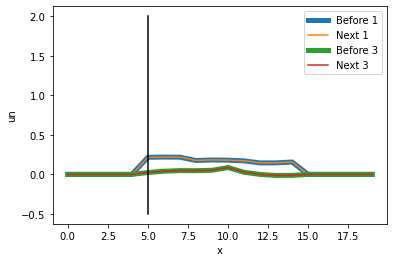

In [5]:
ib, ie = 40, 60
uveln19 = restart_file.un[0, 25-1]
uvelb19 = restart_file.ub[0, 25-1]
uvelb19[896, ib:ie].plot(label="Before 1", linewidth=5)
uveln19[896, ib:ie].plot(label="Next 1")
uvelb19[894, ib:ie].plot(label="Before 3", linewidth=5)
uveln19[894, ib:ie].plot(label="Next 3")
plt.plot([45-ib, 45-ib], [-0.5, 2], color='k');
plt.legend();

In [6]:
restart_file.un[0, :, 896, :] = restart_file.un[0, :, 895, :]
restart_file.ub[0, :, 896, :] = restart_file.ub[0, :, 895, :]
restart_file.vn[0, :, 895, :] = restart_file.vn[0, :, 894, :]
restart_file.vb[0, :, 895, :] = restart_file.vb[0, :, 894, :]

In [7]:
restart_file.attrs['Modified'] = 'copied velocity one away from north boundary to boundary'
restart_file.attrs

{'file_name': 'SalishSea_04356720_restart.nc',
 'TimeStamp': '15/01/2021 09:59:01 -0800',
 'Modified': 'copied velocity one away from north boundary to boundary'}

In [8]:
restart_file.to_netcdf('SalishSea_04356720_restart.nc')